2025-08-25 16:15:35.089691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756138535.396533      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756138535.473261      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Train1 - ['sad.jpg', 'saadgirl.jpg', 'happy.jpg', 'data', 'very-happy-people.jpg']
Train2 - ['sad.jpg', 'saadgirl.jpg', 'happy.jpg', 'data', 'very-happy-people.jpg']
['sad.jpg', 'saadgirl.jpg', 'happy.jpg', 'data', 'very-happy-people.jpg']
Train Classes - ['sad', 'happy']
Validation Classes - ['sad', 'happy']


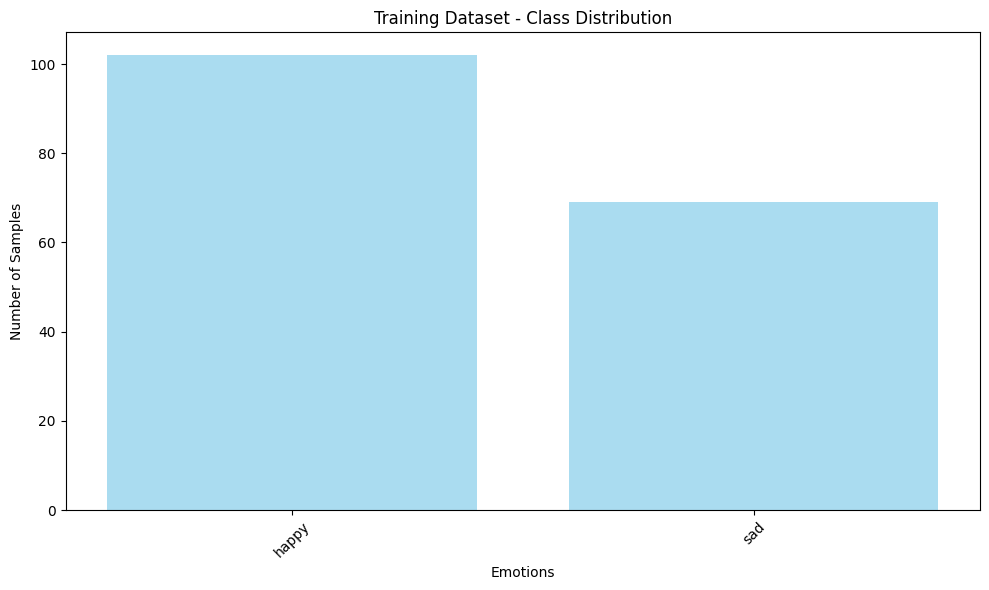

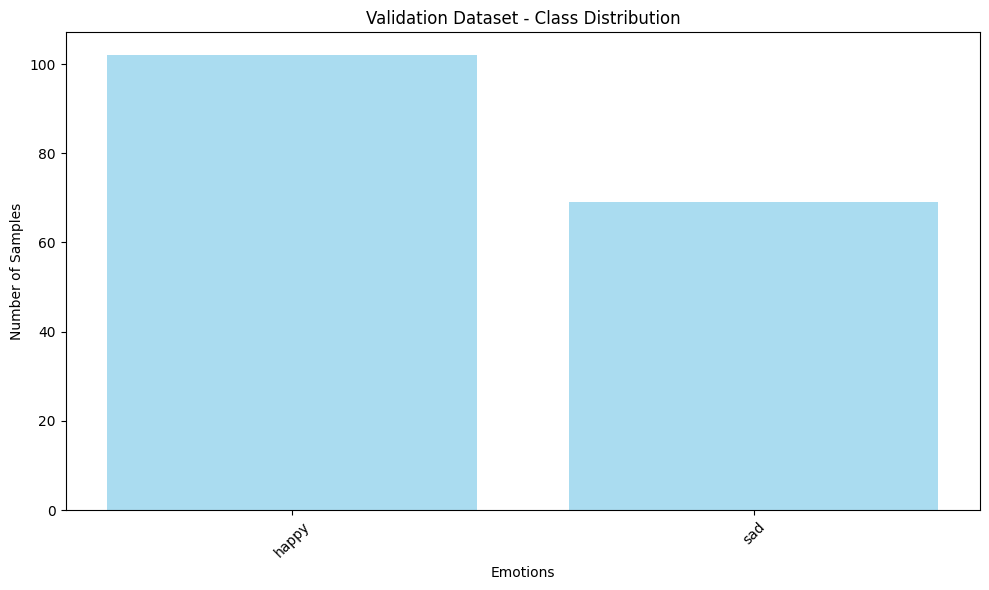

Train images shape: (171, 48, 48, 1)
Test images shape: (171, 48, 48, 1)
Train labels shape: (171, 2)
Test labels shape: (171, 2)


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import itertools
     

# Constants
IMG_SIZE = 48
DATA_DIR = '/kaggle/input/happy-and-sad-image'
     

import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
train1 = os.listdir(DATA_DIR)
train2 = os.listdir(DATA_DIR)
print(f'Train1 - {train1}')
print(f'Train2 - {train2}')
data_dir = DATA_DIR
print(os.listdir(data_dir))
classes_train = os.listdir(data_dir + f"/{train1[3]}")
classes_valid = os.listdir(data_dir + f"/{train2[3]}")
print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')
     
import torchvision.transforms as transforms

# Define transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])
     

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Load the datasets
train_dataset = ImageFolder(root=os.path.join(DATA_DIR, train1[3]), transform=transform)
val_dataset = ImageFolder(root=os.path.join(DATA_DIR, train2[3]), transform=transform)
     
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Load the datasets
train_dataset = ImageFolder(root=os.path.join(DATA_DIR, train1[3]), transform=transform)
val_dataset = ImageFolder(root=os.path.join(DATA_DIR, train2[3]), transform=transform)
     

def plot_class_distribution(dataset, title):
    class_counts = {}
    for _, label in dataset:
        class_name = emotion_labels[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', alpha=0.7)
    plt.title(f'{title} - Class Distribution')
    plt.xlabel('Emotions')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return class_counts

# Define emotion_labels based on the dataset classes
emotion_labels = {i: class_name for i, class_name in enumerate(train_dataset.classes)}

train_counts = plot_class_distribution(train_dataset, 'Training Dataset')
val_counts = plot_class_distribution(val_dataset, 'Validation Dataset')

# ------------------------- Convert Dataset to NumPy Arrays -------------------------

def dataset_to_numpy(dataset, n_samples):
    images = []
    labels = []
    # Use the actual number of samples available in the dataset
    num_samples_to_extract = min(n_samples, len(dataset))
    for i in range(num_samples_to_extract):
        img_tensor, label = dataset[i]
        img_array = img_tensor.numpy().transpose(1, 2, 0)  # (1, 48, 48) → (48, 48, 1)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Define number of samples to extract (these values will be capped by the actual dataset size)
n_train = 5000
n_test = 3000

train_images, train_labels = dataset_to_numpy(train_dataset, n_train)
test_images, test_labels = dataset_to_numpy(val_dataset, n_test)

# Clip values (just in case)
train_images = np.clip(train_images, 0.0, 1.0)
test_images = np.clip(test_images, 0.0, 1.0)

# One-hot encode labels
train_labels_categorical = to_categorical(train_labels, num_classes=len(emotion_labels))
test_labels_categorical = to_categorical(test_labels, num_classes=len(emotion_labels))

# ------------------------- Final Shape Checks -------------------------

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels_categorical.shape}")
print(f"Test labels shape: {test_labels_categorical.shape}")

In [3]:
# ---------------- Imports ----------------
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# ---------------- Data Augmentation ----------------
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(train_images)

# ---------------- CNN Model ----------------
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(emotion_labels), activation='softmax')
])

# ---------------- Compile ----------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-25 16:17:23.835361: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 484,610 (1.85 MB)

 Trainable params: 484,610 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# ---------------- Train the CNN ----------------
history = model.fit(
    datagen.flow(train_images, train_labels_categorical, batch_size=32),
    epochs=50,
    validation_data=(test_images, test_labels_categorical)
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - accuracy: 0.5016 - loss: 0.6990 - val_accuracy: 0.5965 - val_loss: 0.6580
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.5975 - loss: 0.6669 - val_accuracy: 0.5965 - val_loss: 0.6572
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.6273 - loss: 0.6514 - val_accuracy: 0.5965 - val_loss: 0.6636
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.5837 - loss: 0.6603 - val_accuracy: 0.5965 - val_loss: 0.6488
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.6209 - loss: 0.6275 - val_accuracy: 0.6082 - val_loss: 0.6367
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.6284 - loss: 0.6478 - val_accuracy: 0.6433 - val_loss: 0.6286
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.6804 - loss: 0.6199 - val_accuracy: 0.7251 - val_loss: 0.5994
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7351 - loss: 0.5882 - val_accuracy: 0.7602 - val_loss: 0.5607
Epo

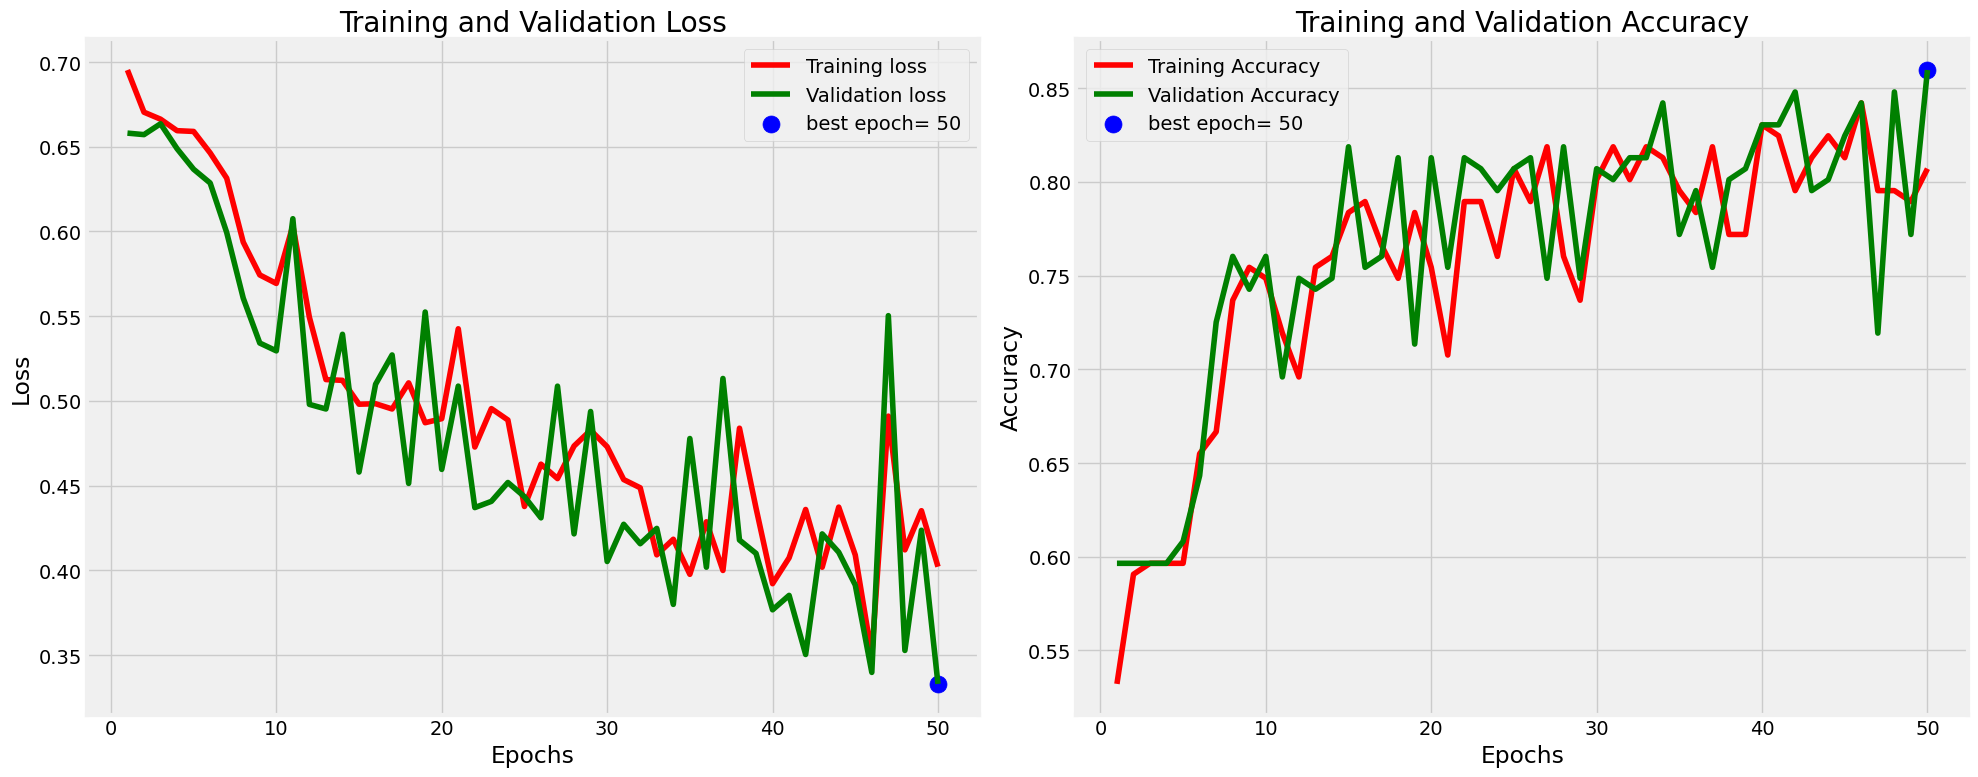

6/6 - 0s - 39ms/step - accuracy: 0.8596 - loss: 0.3330
Test Loss: 0.3330
Test Accuracy: 0.8596
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Classification Report:
              precision    recall  f1-score   support

       happy       0.82      0.98      0.89       102
         sad       0.96      0.68      0.80        69

    accuracy                           0.86       171
   macro avg       0.89      0.83      0.84       171
weighted avg       0.88      0.86      0.85       171



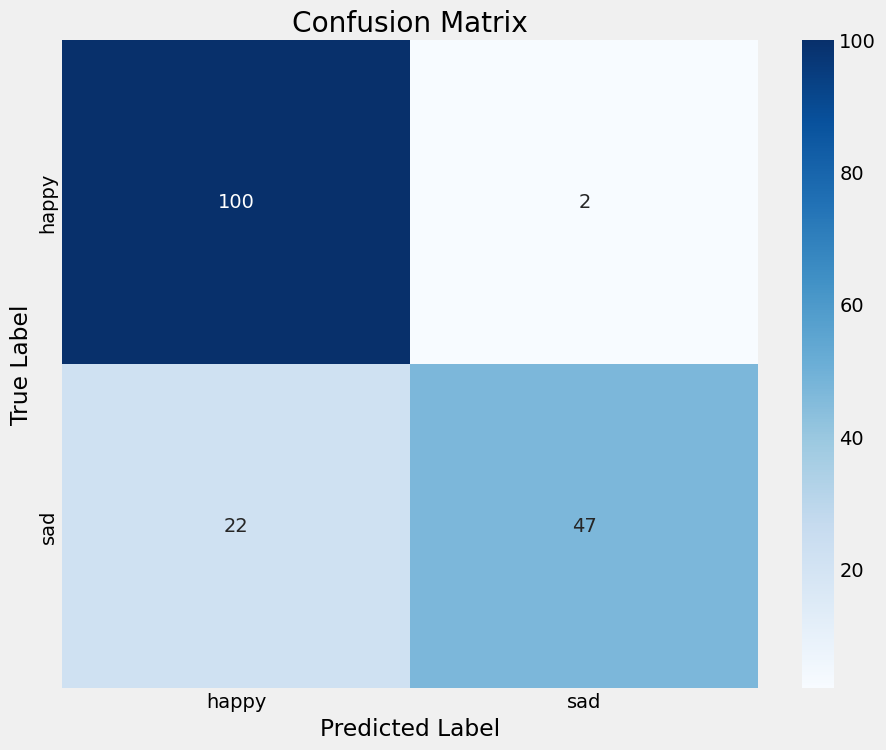

In [5]:
# =============================
# Training History Visualization
# =============================

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

# Loss
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# =============================
# Evaluate the model on the test set
# =============================
test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# =============================
# Predictions and Classification Report
# =============================
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot back to integer labels for ground truth
true_labels = np.argmax(test_labels_categorical, axis=1)

# Predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=list(emotion_labels.values())))

# =============================
# Confusion Matrix
# =============================
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(emotion_labels.values()),
            yticklabels=list(emotion_labels.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()